# Arle Fabian Rodriguez Urrea

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats

#### Se importa dataset train.csv

In [135]:
train = pd.read_csv('train.csv')

#### Se listan las columnas del dataset

In [136]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Numero de filas y columnas que contiene el dataset

In [137]:
train.shape

(1460, 81)

#### Tipos de datos del dataset

In [138]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Descripción de numero de datos faltantes para cada vaiable

In [139]:
NANColumns=[]
i=-1
for a in train.isnull().sum():
    i+=1
    if a!=0:
        print(train.columns[i],a)
        NANColumns.append(train.columns[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


### Matriz de correlacion
##### La Matriz de correlacion evidencia que la correlacion la mayría de los parametros tienden a tener una correlación positiva con SalePrice

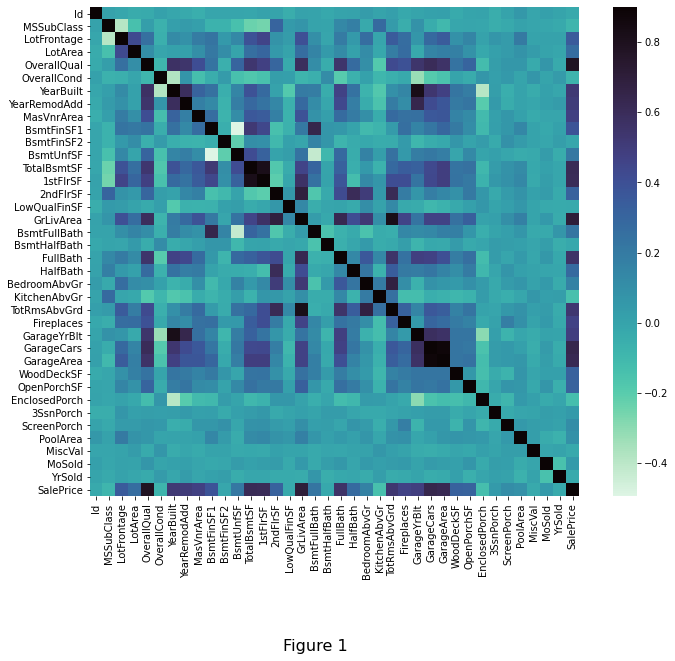

In [140]:
k=1
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatm = sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'mako_r');
heatm.text(15, 50, 'Figure {}'.format(k),fontsize=16)
k=k+1

# Variables con mayor correlacion respecto a la variable TotalBsmtSF
#### Se puede notar que la variable que tiene mayor correlacion con la variable TotalBsmtSF es OverallQual con 0.791

<AxesSubplot:>

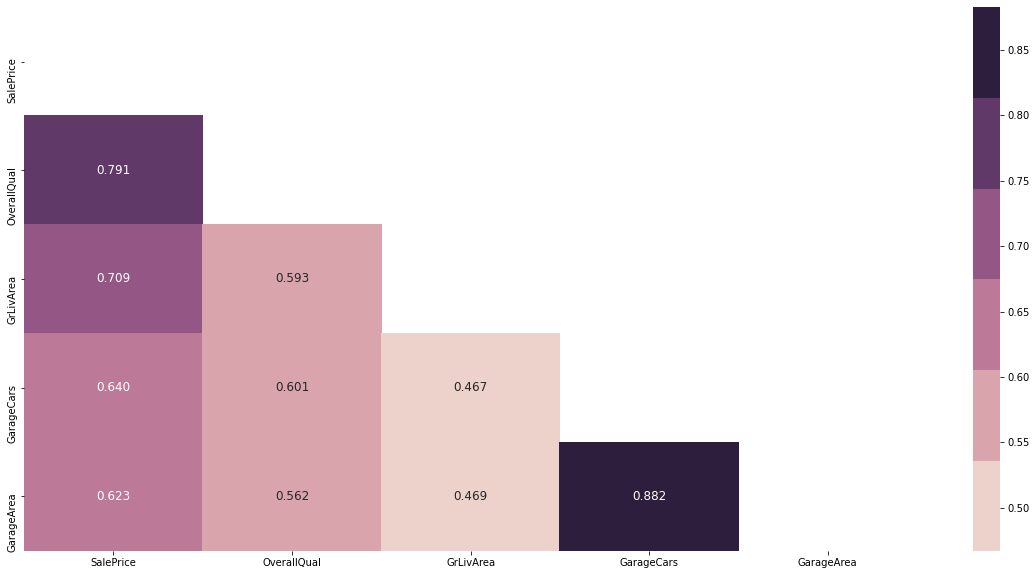

In [141]:
corr_feat = train.corr().nlargest(5,"SalePrice")["SalePrice"].index
cmap = np.corrcoef(train[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":12},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)

# Variables con mayor correlacion respecto a la variable SalePrice

#### Se puede notar que la variable que tiene mayor correlacion con la variable SalePrice es 1stFlrSF con 0.820

<AxesSubplot:>

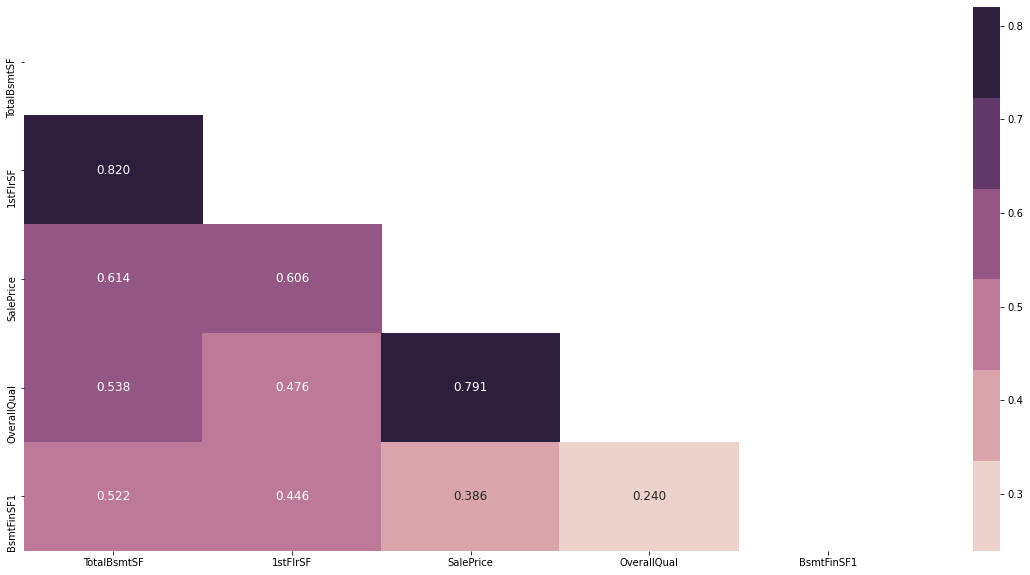

In [128]:
corr_feat = train.corr().nlargest(5,"TotalBsmtSF")["TotalBsmtSF"].index
cmap = np.corrcoef(train[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":12},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)

### Porcentaje y numero de valores fantantantes del dataset train.csv

In [144]:
def missing_value(df):
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    percentage = df.isnull().sum() *100 / df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(train)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [116]:
from scipy.stats import norm

### Se geenera una grafica de distribución para la variable SalePrice

#### Se evidencia que la variable SalePrice es positivamente simetrica

In [132]:
df_clean['SalePrice'] = np.log(df_clean['SalePrice'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


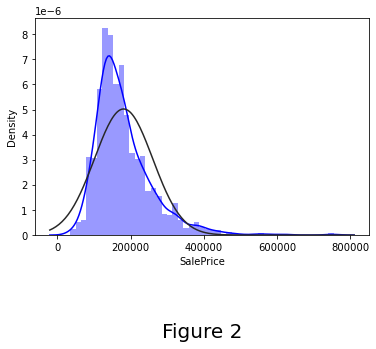

In [142]:
sns.distplot(train['SalePrice'], color= 'blue', fit=norm);
plt.title('Figure {}'.format(k), y=-0.5, fontsize = 20)
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [35]:
from matplotlib import pyplot

#### Se evidencia una proporcionalidad importante entre las variables GrLivArea y SalePrice

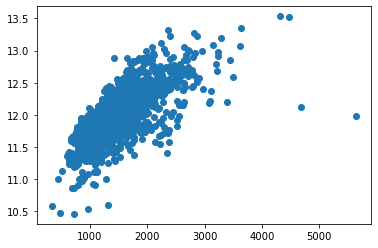

In [52]:
plt.scatter(train["GrLivArea"], train["SalePrice"])

### En los siguientes graficos se puede analizar

#### Se muestra que la variable SalePrice expone una distribución adecuada
#### Se puede ver que la variable SalePrice aumenta progresivamente hacia la derecha, lo que indica que las viviendas con un precio mas bajo son mas llamativas para los compradores.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


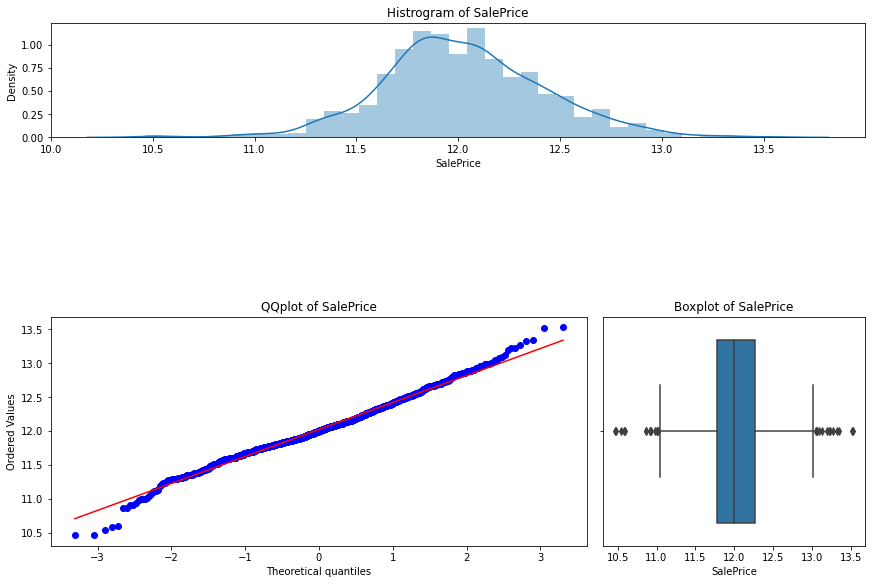

In [89]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)

ax1 = fig.add_subplot(grid[0,:])
sns.distplot(train["SalePrice"],ax=ax1)
ax1.set_title("Histrogram of SalePrice")

ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(train["SalePrice"],plot=ax2)
ax2.set_title("QQplot of SalePrice")

ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(train["SalePrice"],ax=ax3,orient="v")
ax3.set_title("Boxplot of SalePrice")
plt.show()

### Se limpian los datos numéricos no validos